# Analysis
---
This notebook is dedicated to analyzing and visualizing the data that was cleaned and consolidated in the data preprocessing phase (see `prepocessing.ipynb`). A recommendation in response to the business problem outlined below and based on the analysis conducted is included at the bottom of this notebook.

## Business Problem
> Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

---

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Individual cleaned dataframes
df_imdb_title_basics = pd.read_csv('../data/cleaned/df_cleaned_imdb_title_basics.csv')
df_imdb_title_ratings = pd.read_csv('../data/cleaned/df_cleaned_imdb_title_ratings.csv')
df_tn_movie_budgets = pd.read_csv('../data/cleaned/df_cleaned_tn_movie_budgets.csv')

# Consolidated dataframe
df_merged_final = pd.read_csv('../data/cleaned/df_merged_final.csv')

---

## Questions
Answering the following questions will help form and provide evidence for my ultimate recommendation.

### 1. How important are foreign box office results to the overall return on investment?

### 2. Which genres have the highest median return on investment?

### 3. Are there any noticeable trends in the number of movies produced in a particular genre?
The goal of this question is to create a proxy for genre popularity by investigating the change in the amount of movies produced in a particular genre over time. While popularity does not necessarily imply whether or not a particular genre is profitable, this information can be used in conjunction with answers to other questions to evaluate the probability of succes.

To start, I'll whittle down the dataframe to just information regarding the start year and genre.

In [3]:
cols_to_drop = ['primary_title', 'original_title', 'runtime_minutes', 'averagerating', 'numvotes', 
                'release_date', 'release_year', 'movie', 'production_budget', 'domestic_gross', 
                'foreign_gross', 'worldwide_gross']

df_genre_trends = df_merged_final.drop(columns=cols_to_drop)
df_genre_trends.head(3)

,tconst,start_year,Game-Show,Mystery,Musical,Family,War,Sport,Reality-TV,Short,...,Adventure,Fantasy,Thriller,Animation,Biography,Crime,Romance,Sci-Fi,News,Drama
0,tt0063540,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,tt0066787,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,tt0069049,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


The dataframe now needs to be pivoted by `start_year`.

In [4]:
df_genre_count_by_year = pd.pivot_table(df_genre_trends, index='start_year', aggfunc='sum')
df_genre_count_by_year

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
start_year,,,,,,,,,,,,,,,,,,,,,
2010,889.0,0.0,500.0,198.0,792.0,2178.0,537.0,4381.0,4290.0,479.0,...,177.0,7.0,847.0,242.0,0.0,185.0,3.0,831.0,140.0,38.0
2011,910.0,0.0,580.0,256.0,889.0,2327.0,570.0,4742.0,4523.0,598.0,...,201.0,0.0,846.0,276.0,1.0,217.0,4.0,908.0,138.0,44.0
2012,915.0,1.0,637.0,243.0,1011.0,2481.0,599.0,5208.0,4792.0,677.0,...,245.0,5.0,869.0,283.0,1.0,219.0,4.0,1016.0,136.0,45.0
2013,1007.0,0.0,791.0,254.0,1252.0,2652.0,716.0,5563.0,5348.0,862.0,...,301.0,9.0,1034.0,355.0,0.0,275.0,4.0,1245.0,119.0,41.0
2014,1072.0,3.0,793.0,280.0,1375.0,2810.0,748.0,5961.0,5475.0,876.0,...,330.0,8.0,1138.0,351.0,0.0,278.0,4.0,1318.0,171.0,63.0
2015,1092.0,2.0,713.0,309.0,951.0,2747.0,737.0,6015.0,5483.0,680.0,...,161.0,19.0,1082.0,388.0,0.0,255.0,11.0,1327.0,170.0,52.0
2016,1207.0,5.0,706.0,301.0,817.0,2852.0,859.0,6054.0,5587.0,594.0,...,57.0,19.0,1073.0,379.0,0.0,275.0,8.0,1394.0,164.0,40.0
2017,1254.0,4.0,671.0,334.0,744.0,2788.0,776.0,6124.0,5609.0,578.0,...,39.0,15.0,975.0,422.0,4.0,234.0,2.0,1370.0,161.0,54.0
2018,1127.0,9.0,616.0,338.0,590.0,2833.0,730.0,5294.0,5620.0,566.0,...,29.0,11.0,982.0,389.0,5.0,199.0,7.0,1485.0,143.0,59.0


This data was likely gathered some time in 2019 given the sharp drop in the number of movies during that year with no apparent reason (unlike a year such as 2020 where the impact of COVID-19 may have been a cause for the decline). As a result, only the rows with a `start_year` less than or equal to 2018 will be kept for analysis.

In [5]:
df_genre_count_by_year = df_genre_count_by_year.loc[df_genre_count_by_year.index <= 2018]
df_genre_count_by_year

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
start_year,,,,,,,,,,,,,,,,,,,,,
2010,889.0,0.0,500.0,198.0,792.0,2178.0,537.0,4381.0,4290.0,479.0,...,177.0,7.0,847.0,242.0,0.0,185.0,3.0,831.0,140.0,38.0
2011,910.0,0.0,580.0,256.0,889.0,2327.0,570.0,4742.0,4523.0,598.0,...,201.0,0.0,846.0,276.0,1.0,217.0,4.0,908.0,138.0,44.0
2012,915.0,1.0,637.0,243.0,1011.0,2481.0,599.0,5208.0,4792.0,677.0,...,245.0,5.0,869.0,283.0,1.0,219.0,4.0,1016.0,136.0,45.0
2013,1007.0,0.0,791.0,254.0,1252.0,2652.0,716.0,5563.0,5348.0,862.0,...,301.0,9.0,1034.0,355.0,0.0,275.0,4.0,1245.0,119.0,41.0
2014,1072.0,3.0,793.0,280.0,1375.0,2810.0,748.0,5961.0,5475.0,876.0,...,330.0,8.0,1138.0,351.0,0.0,278.0,4.0,1318.0,171.0,63.0
2015,1092.0,2.0,713.0,309.0,951.0,2747.0,737.0,6015.0,5483.0,680.0,...,161.0,19.0,1082.0,388.0,0.0,255.0,11.0,1327.0,170.0,52.0
2016,1207.0,5.0,706.0,301.0,817.0,2852.0,859.0,6054.0,5587.0,594.0,...,57.0,19.0,1073.0,379.0,0.0,275.0,8.0,1394.0,164.0,40.0
2017,1254.0,4.0,671.0,334.0,744.0,2788.0,776.0,6124.0,5609.0,578.0,...,39.0,15.0,975.0,422.0,4.0,234.0,2.0,1370.0,161.0,54.0
2018,1127.0,9.0,616.0,338.0,590.0,2833.0,730.0,5294.0,5620.0,566.0,...,29.0,11.0,982.0,389.0,5.0,199.0,7.0,1485.0,143.0,59.0


Genres with zero movies produced in 2010 present an issue since growth between then and 2018 cannot be calculated without running into a division by zero error. Since these genres have very few movies produced in any given year anyways, they can be dropped.

In [6]:
cols_to_drop = [col for col in df_genre_count_by_year.columns if df_genre_count_by_year[col][2010] == 0]
cols_to_drop

['Adult', 'Game-Show', 'Short']

In [7]:
df_genre_count_by_year = df_genre_count_by_year.drop(columns=cols_to_drop)

In [8]:
def get_pct_chg(genre):
    if df_genre_count_by_year[genre][2010] > 0:
        return round(((df_genre_count_by_year[genre][2018] / df_genre_count_by_year[genre][2010]) - 1) * 100, 2)

# Previewing the data
for col in df_genre_count_by_year.columns:
    print(col.ljust(15), get_pct_chg(col))

Action          26.77
Adventure       23.2
Animation       70.71
Biography       -25.51
Comedy          30.07
Crime           35.94
Documentary     20.84
Drama           31.0
Family          18.16
Fantasy         59.48
History         -26.58
Horror          71.93
Music           -12.76
Musical         9.09
Mystery         46.53
News            -83.62
Reality-TV      57.14
Romance         15.94
Sci-Fi          60.74
Sport           7.57
Talk-Show       133.33
Thriller        78.7
War             2.14
Western         55.26


In [22]:
# Sorting the data for easier plotting
df_genre_pct_chg = pd.DataFrame(
    data=[get_pct_chg(col) for col in df_genre_count_by_year.columns],
    columns=['Pct_Chg'],
    index=df_genre_count_by_year.columns
).sort_values('Pct_Chg', ascending=False)

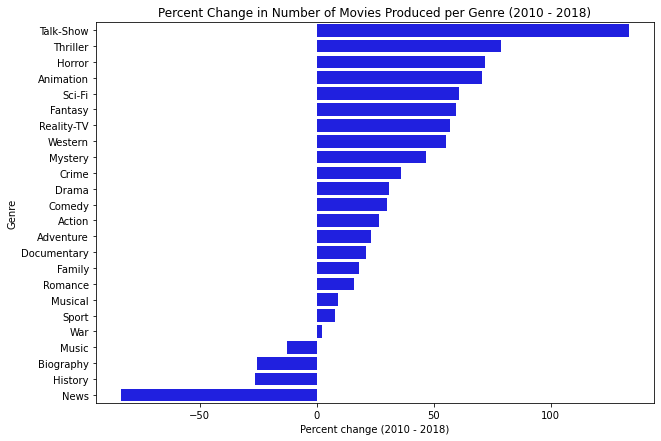

In [28]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title('Percent Change in Number of Movies Produced per Genre (2010 - 2018)')
ax.set_ylabel('Genre')
ax.set_xlabel('Percent change (2010 - 2018)')
sns.barplot(
    x=df_genre_pct_chg['Pct_Chg'].values,
    y=df_genre_pct_chg.index,
    orient='h',
    color='blue'
);

### 4. What is the correlation between the time of year when a movie is released and its return on investment?

---

## Conclusion and Recommendations